In [1]:
import seaborn
import seaborn.objects as so
import pandas
%matplotlib inline

In [2]:
df = pandas.read_csv('../data/survey2024.csv')
df.fillna('',inplace=True)
df.shape

(291, 53)

In [3]:
df_list = []
short_colnames = {'grants you apply for':'grants\n(mine)',
                  'grants someone else applies for':'grants\n(others\')',
                  'internal granted funding':'internal',
                  'recharge for consulting':'consulting',
                  'recharge on image analysis projects (data analysis as a service)':'analysis\nprojects',
                  'recharge on other services (e.g. microscope time)':'microscope\nfees',
                  'I don\'t know':"I don\'t\nknow"}
long_colnames = {f'Q5: If you work in a facility: how much of your budget comes from each of these? Please do not answer if you do not work in a facility. [{k}]':k for k,v in short_colnames.items()}

rows_with_answers = '(`'+'`  != "") | (`'.join(long_colnames)+'`  != "")'
df.query(rows_with_answers).shape

(166, 53)

(110, 53) Q5: If you work in a facility: how much of your budget comes from each of these? Please do not answer if you do not work in a facility. [grants you apply for]
0 %        49
0-25%      42
25-50%      9
50-75%      9
75-100%     1
Name: count, dtype: int64
(115, 53) Q5: If you work in a facility: how much of your budget comes from each of these? Please do not answer if you do not work in a facility. [grants someone else applies for]
0-25%      52
0 %        36
25-50%     18
75-100%     5
50-75%      4
Name: count, dtype: int64
(118, 53) Q5: If you work in a facility: how much of your budget comes from each of these? Please do not answer if you do not work in a facility. [internal granted funding]
0-25%      34
25-50%     26
50-75%     25
75-100%    20
0 %        13
Name: count, dtype: int64
(80, 53) Q5: If you work in a facility: how much of your budget comes from each of these? Please do not answer if you do not work in a facility. [recharge for consulting]
0 %       55
0-25% 

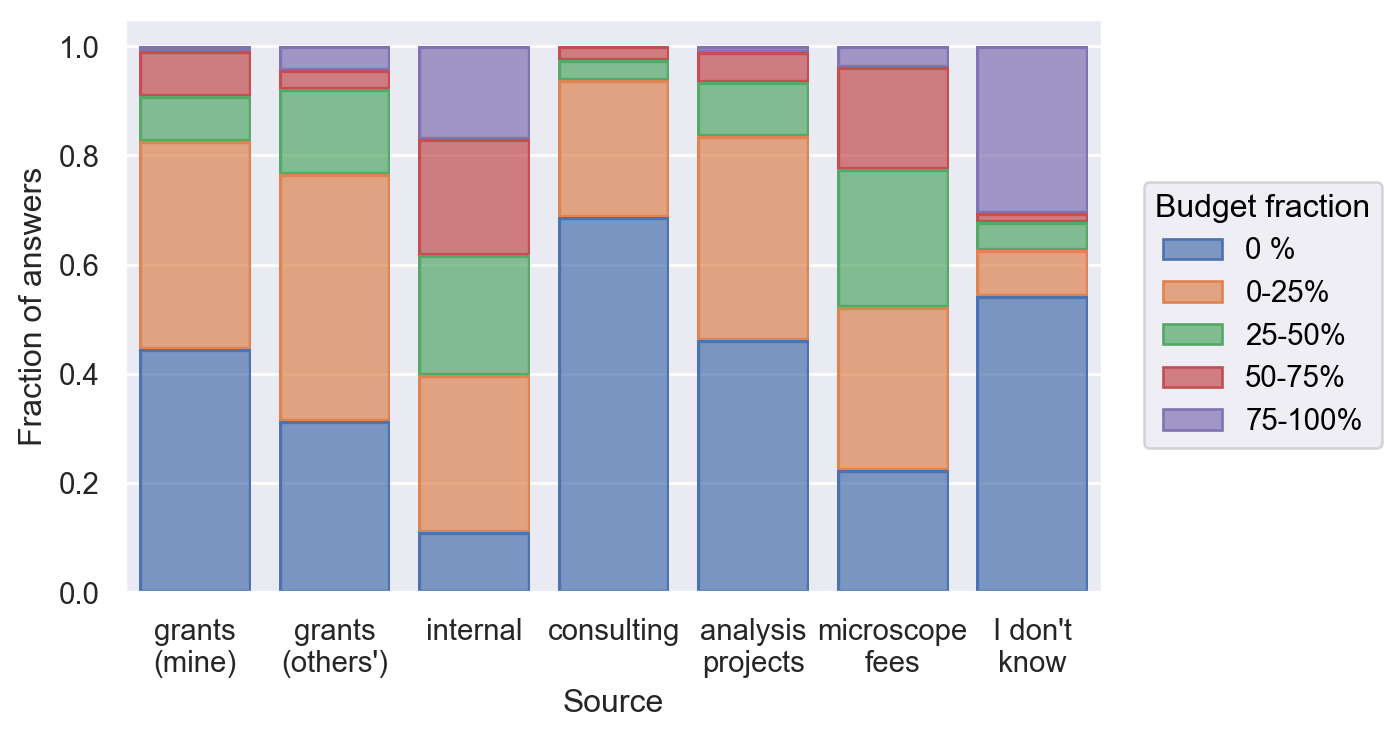

In [4]:
for eachcol in long_colnames.keys():
    sub_df=df.query(f'`{eachcol}` != ""') # remove this line to make it not ignore unanswered lines
    print(sub_df.shape,sub_df[eachcol].value_counts())
    normed_df = sub_df[eachcol].value_counts(normalize=True)
    normed_df = normed_df.rename(short_colnames[long_colnames[eachcol]])# have to do it here, newlines in the query are sad :(
    df_list.append(normed_df)
normed_df = pandas.concat(df_list,axis=1)
normed_df.fillna(0,inplace=True)

melted = normed_df.melt(ignore_index=False)
melted = melted.reset_index(names='percent')

p = (so.Plot(melted,x='variable',y='value',color='percent')
     .add(so.Bar(), so.Stack())
     .layout(size=(6,4))
     .label(x="Source",y="Fraction of answers",color="Budget fraction")
    )
p.plot()

In [5]:
melted

,percent,variable,value
0,0 %,grants\n(mine),0.445455
1,0-25%,grants\n(mine),0.381818
2,25-50%,grants\n(mine),0.081818
3,50-75%,grants\n(mine),0.081818
4,75-100%,grants\n(mine),0.009091
5,0 %,grants\n(others'),0.313043
6,0-25%,grants\n(others'),0.452174
7,25-50%,grants\n(others'),0.156522
8,50-75%,grants\n(others'),0.034783
9,75-100%,grants\n(others'),0.043478
